<a href="https://colab.research.google.com/github/MaggieWelch/labs/blob/main/MHW_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Practice writing queries using the saferproducts.gov API and your web browser.



2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.

In [14]:
import pandas as pd
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Toys'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
print(data)
response.close()



[{'RecallID': 7842, 'RecallNumber': '16770', 'RecallDate': '2016-08-30T00:00:00', 'Description': 'This recall involves the Bump and Go Action Egg Laying Chickens with lights, music and bump and go action. The battery-powered plastic toy was sold in two styles - a yellow chicken with an orange head and wings and a multi-colored (yellow, green and orange) chicken. The chicken toy includes three white plastic eggs that are placed into the back of the chicken, and then released from the bottom. The yellow-colored chicken measures 7 inches wide by 6 inches tall by 7 inches deep. The multi-colored chicken measures 7 inches wide by 5 inches tall by 4 inches deep. The eggs for both toys are one inch wide by one inch tall by one inch deep.', 'URL': 'https://www.cpsc.gov/Recalls/2016/Dazzling-Toys-Recalls-Chicken-Toys', 'Title': 'Dazzling Toys Recalls Chicken Toys Due to Choking Hazard (Recall Alert)', 'ConsumerContact': 'Dazzling Toys toll-free at 844-222-2812 between 9 a.m. and 5 p.m. Monday t

In [13]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Blender'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()
df = pd.DataFrame.from_dict(data)

    RecallID RecallNumber           RecallDate  \
0       6570        16034  2015-11-12T00:00:00   
1       6506        15236  2015-09-09T00:00:00   
2       1538        14012  2013-10-31T00:00:00   
3       1464        13288  2013-09-19T00:00:00   
4       1450        13273  2013-08-28T00:00:00   
5       1056        12187  2012-05-24T00:00:00   
6        764        11328  2011-09-15T00:00:00   
7         53        10052  2009-12-02T00:00:00   
8       4995        09032  2008-10-30T00:00:00   
9       4399        08361  2008-08-07T00:00:00   
10      2896        05132  2005-03-11T00:00:00   
11      5594        95020  1994-11-03T00:00:00   

                                          Description  \
0   This recall involves 12 models of Ninja profes...   
1   The recalled blender is the Kenwood Blend-X PR...   
2   This recall involves Calphalon XL 9 speed blen...   
3   This recall involves Frigidaire Professional© ...   
4   The recall involves Vitamix 64-ounce Low-Profi...   
5   The

3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.




In [15]:
temp = df['RemedyOptions']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])>0:
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option'] )
        clean_values.append(values)
    else:
        clean_values.append('')
df['remedy'] = clean_values
print(df['remedy'])

0     [New Instructions]
1               [Repair]
2               [Repair]
3              [Replace]
4               [Repair]
5               [Refund]
6               [Refund]
7                       
8                       
9                       
10                      
11                      
Name: remedy, dtype: object


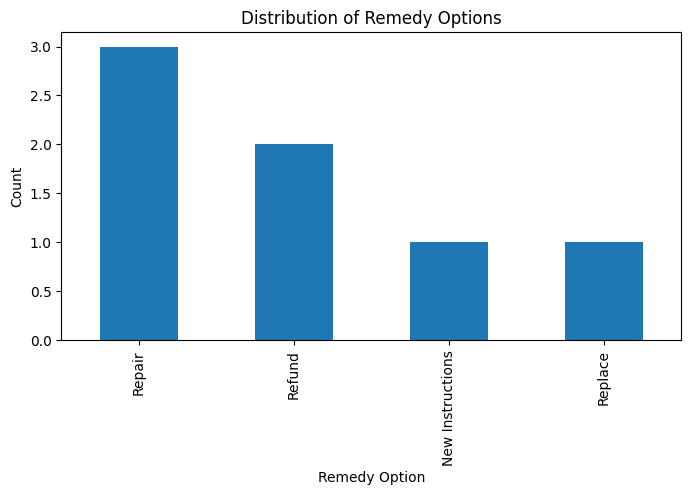

In [16]:
import matplotlib.pyplot as plt

# Flatten the list of remedies into individual items for plotting
remedy_flat = [item for sublist in df['remedy'] if isinstance(sublist, list) for item in sublist]

# Plot the remedy option counts
plt.figure(figsize=(8, 4))
pd.Series(remedy_flat).value_counts().plot(kind='bar')
plt.title("Distribution of Remedy Options")
plt.xlabel("Remedy Option")
plt.ylabel("Count")
plt.show()



5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.

In [18]:
import pandas as pd
import urllib.request
import json
url = 'https://www.eia.gov/opendata/browser/electricity'
query = '/state-electricity-profiles/energy-efficiency'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
print(data)
response.close()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

I could not get through the first step of reading in the data. I am facing confusion as the query does not contain any "?" or "&" signs. I assume this is part of the reason for the error, however when I put my errored code into chat to help revise it, it said I needed to use the API endpoint provided by the source, which I am having issues locating. Python is relatively new to me, but I look forward to getting more comforable with it as the year progresses